# import the needed libraries😉


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df=pd.read_csv("D:\\Data_Clean\\supermarket_sales - Sheet1.csv")

In [43]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Change Data Types


In [45]:
df["Date"] =pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])



C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5568\1134911513.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"]=pd.to_datetime(df["Time"])


# Feature Engineering


In [46]:
df["Houres"]=df["Time"].dt.hour
df["Minuets"]=df["Time"].dt.minute
df["Month"]=df["Date"].dt.month



In [47]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Houres,Minuets,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-02-20 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,8,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-02-20 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,29,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-02-20 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,23,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-02-20 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,33,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-02-20 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,37,2


# data transformation. 

In [48]:
df["Month"].value_counts()


Month
1    352
3    345
2    303
Name: count, dtype: int64

In [49]:
df["Month"]=df["Month"].replace(1,"Jan")
df["Month"]=df["Month"].replace(2,"Feb")
df["Month"]=df["Month"].replace(3,"Mar")

In [50]:
df["Gender"].describe()

count       1000
unique         2
top       Female
freq         501
Name: Gender, dtype: object

# Check Duplicated

In [51]:
df.duplicated().any()

False

# Remove Unnecessary Column

In [52]:
df.drop(["Invoice ID"],axis=1,inplace=True)

In [53]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Houres,Minuets,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-02-20 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,8,Jan
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-02-20 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,29,Mar
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-02-20 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,23,Mar
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-02-20 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,33,Jan
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-02-20 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,37,Feb


# Anlysis Data

In [54]:
pd.DataFrame({"Count":df.shape[0],
             "Cardenalty":df.nunique(),
            'nulls%': df.isnull().mean() * 100,
             " Nulls % ":df.isnull().mean()*100})

,Count,Cardenalty,nulls%,Nulls %
Branch,1000,3,0.0,0.0
City,1000,3,0.0,0.0
Customer type,1000,2,0.0,0.0
Gender,1000,2,0.0,0.0
Product line,1000,6,0.0,0.0
Unit price,1000,943,0.0,0.0
Quantity,1000,10,0.0,0.0
Tax 5%,1000,990,0.0,0.0
Total,1000,990,0.0,0.0
Date,1000,89,0.0,0.0


In [55]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Houres,Minuets
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2024-02-20 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,14.910000,30.09800
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2024-02-20 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,10.000000,0.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2024-02-20 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,12.000000,16.00000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2024-02-20 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000,30.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2024-02-20 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,18.000000,44.00000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2024-02-20 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,20.000000,59.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858,3.186857,16.88068


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [57]:
df.head(
    
)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Houres,Minuets,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-02-20 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,8,Jan
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-02-20 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,29,Mar
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-02-20 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,23,Mar
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-02-20 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,33,Jan
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-02-20 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,37,Feb


# data visualization

**Percentage of Each Branch**



In [58]:
count_A=df.loc[df["Branch"]=="A","Branch"].value_counts().sum()
count_B=df.loc[df["Branch"]=="B","Branch"].value_counts().sum()
count_C=df.loc[df["Branch"]=="C","Branch"].value_counts().sum()




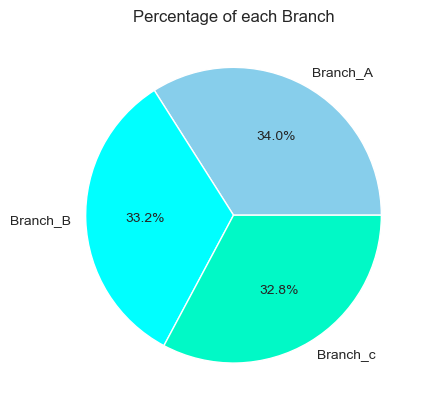

In [59]:
x=plt.pie([count_A,count_B,count_C],labels=["Branch_A","Branch_B","Branch_c"],autopct="%1.1f%%",colors=['#87CEEB',"#00FFFF","#01F9C6"])
plt.title("Percentage of each Branch")
plt.show()

In [60]:
City_A=df.loc[df["City"]=="Yangon","City"].value_counts().sum()
City_B=df.loc[df["City"]=="Naypyitaw","City"].value_counts().sum()
City_C=df.loc[df["City"]=="Mandalay","City"].value_counts().sum()



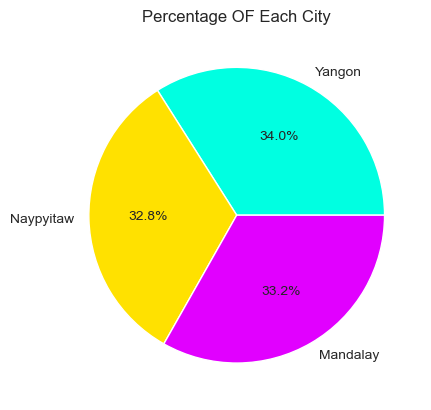

In [61]:
x=plt.pie([City_A,City_B,City_C],labels=["Yangon","Naypyitaw","Mandalay"],autopct="%1.1f%%",colors=["#00FFE1","#FFE100","#E100FF"])
plt.title("Percentage OF Each City")
plt.show()

In [62]:
Member=df.loc[df["Customer type"]=="Member","Customer type"].value_counts().sum()
Normal=df.loc[df["Customer type"]=="Normal","Customer type"].value_counts().sum()


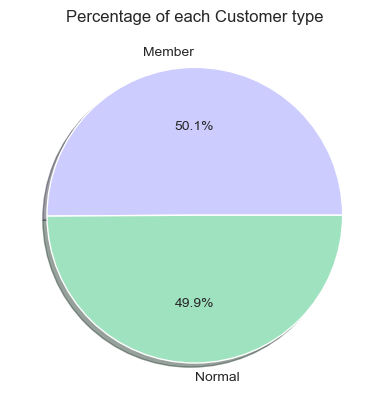

In [63]:
plt.pie(x=[Member,Normal],labels=["Member","Normal"],autopct="%1.1f%%",colors=["#CCCCFF","#9FE2BF"],shadow=0.6)
plt.title("Percentage of each Customer type")
plt.show()

<Axes: xlabel='City', ylabel='Total'>

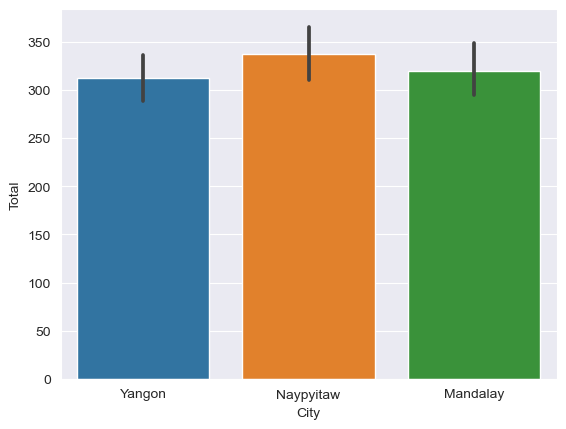

In [64]:
sns.barplot(x="City",y="Total",data=df)

> - It seems that Naypyidaw City has the Highest Sales between the three cities

In [65]:
def bar_chart(feature):
    city_1=df[df["City"]=='Naypyitaw'].groupby(feature)["Total"].sum()
    city_2=df[df["City"]=='Mandalay'].groupby(feature)["Total"].sum()
    city_3=df[df["City"]=='Naypyitaw'].groupby(feature)["Total"].sum()
    data=pd.DataFrame([city_1,city_2,city_3])
    data.index=["Naypyitaw","Mandalay","Yangon"]    
    data.plot(kind="bar",figsize=(10,5))


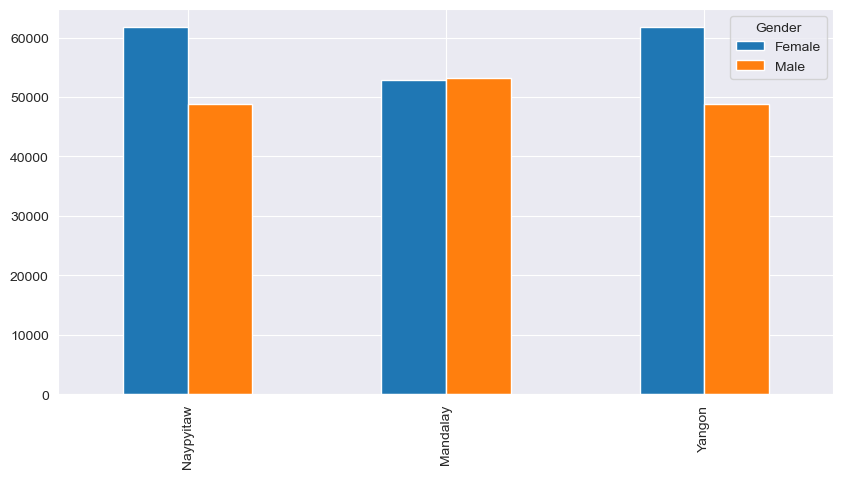

In [66]:
bar_chart("Gender")

>- It look that female and male are almost equal in Mandela and Yangon but in Naypyitaw female do the most sales

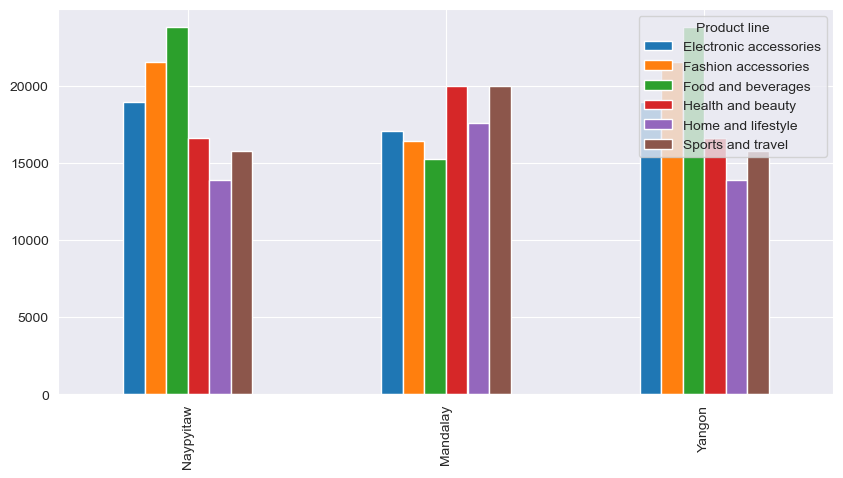

In [67]:
bar_chart("Product line")

>- It is look that the most popular product lines in Naypitaw ans Yangon is Food and Beverages
>- It seems that the most popular product lines in Mandalay are sports and travel equal to health and beauty

In [68]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Houres,Minuets,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-02-20 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,8,Jan
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-02-20 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,29,Mar
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-02-20 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,23,Mar
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-02-20 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,33,Jan
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-02-20 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,37,Feb


In [69]:
x = df.groupby(['Date','Month']).agg({'Quantity':'sum'}).reset_index()
unique_months=df["Month"].unique()

In [70]:
month_date_jan=x[x["Month"]=="Jan"]
month_date_Feb=x[x["Month"]=="Feb"]
month_date_Mar=x[x["Month"]=="Mar"]


C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


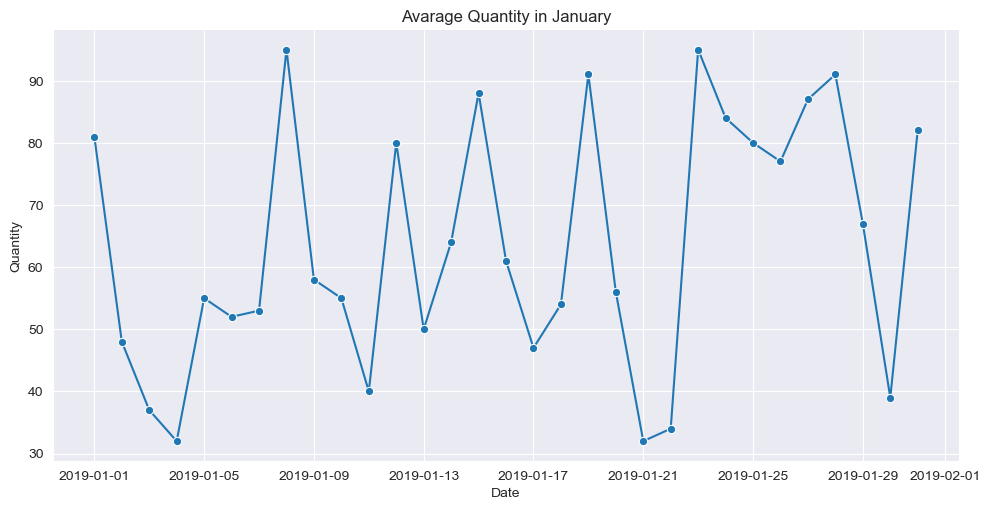

In [71]:
sns.set_style("darkgrid")
sns.relplot(x="Date",y="Quantity",data=month_date_jan,marker="o",kind="line",aspect=2)
plt.title("Avarage Quantity in January")
plt.show()

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


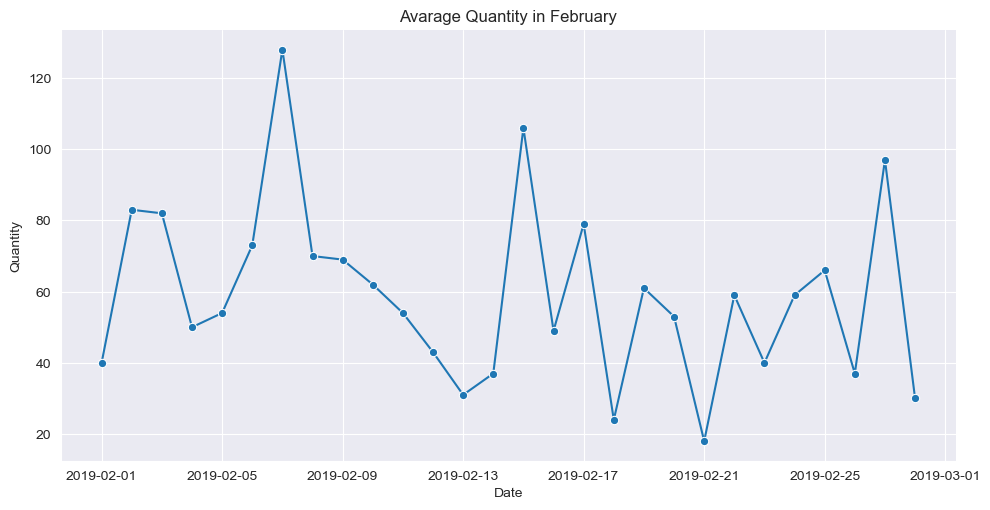

In [72]:
sns.set_style("darkgrid")
sns.relplot(x="Date",y="Quantity",data=month_date_Feb,marker="o",kind="line",aspect=2)
plt.title("Avarage Quantity in February")
plt.show()

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


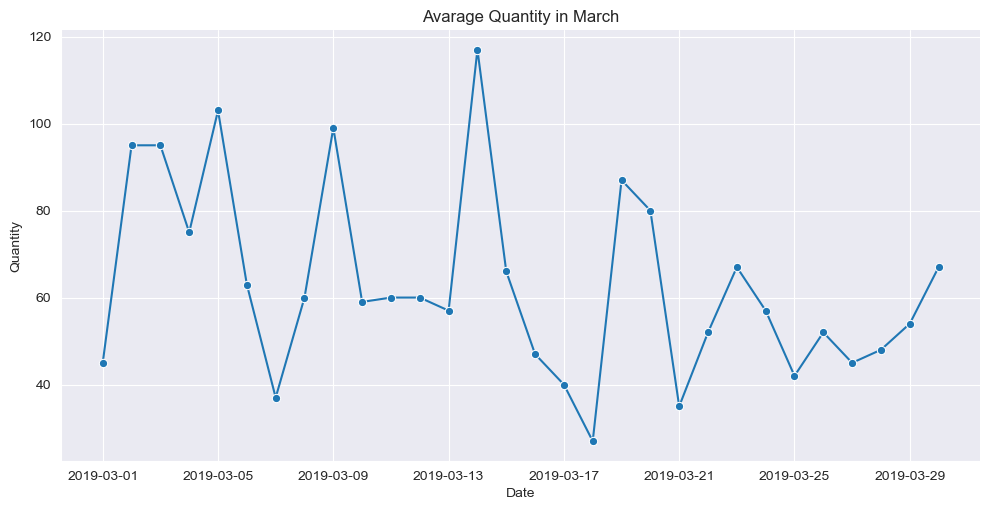

In [73]:
sns.set_style("darkgrid")
sns.relplot(x="Date",y="Quantity",data=month_date_Mar,marker="o",kind="line",aspect=2)
plt.title("Avarage Quantity in March")
plt.show()